In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import torch
import tqdm 
import cv2

In [3]:
def create_one_hot_vector(label, mapping, vals):

    one_hot = [0] * vals
    one_hot[mapping[label]] = 1
    return one_hot

In [10]:
test_images = []
test_labels = []
test_label_indices =[]
label_types = ['angry', 'happy', 'normal']
for j in label_types:
    for i in glob(f'sampled_images\\*\\*.jpg'):

        label = i.split('-')[-2]
        

        img = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)/255
        # print(img.shape)
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_LANCZOS4)
        test_images.append(img.reshape(256,256,1))
        test_labels.append(label)

    # Create a vocabulary of unique labels
vocab = sorted(set(label_types))
print(vocab)
label_to_idx = {label: idx for idx, label in enumerate(vocab)}
print(label_to_idx)
for i in test_labels:
    test_label_indices.append(create_one_hot_vector(i, label_to_idx, 3))
print(test_label_indices[0],test_label_indices[-1])
    

['angry', 'happy', 'normal']
{'angry': 0, 'happy': 1, 'normal': 2}
[1, 0, 0] [0, 0, 1]


In [11]:
test_images = np.array(test_images)
test_labels = np.array(test_label_indices)
print(test_images.shape, test_labels.shape)
np.save('driving_data_test_images.npy', test_images)
np.save('driving_data_test_labels.npy', test_labels)

(1188, 256, 256, 1) (1188, 3)


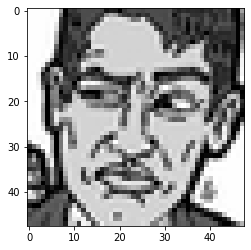

In [13]:
plt.imshow(test_images[0], cmap='gray')

In [17]:
train_images = []
train_labels = []
train_label_indices =[]

label_types = ['angry', 'happy', 'neutral']
for j in label_types:
    for i in tqdm.tqdm(glob(f'archive (1)\\train\\{j}\\*.png')):
        label = i.split('\\')[-2]
        img = cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2GRAY)/255
        train_images.append(img.reshape(48,48,1))
        train_labels.append(label)

    # Create a vocabulary of unique labels
vocab = sorted(set(train_labels))
print(vocab)
label_to_idx = {label: idx for idx, label in enumerate(vocab)}
print(label_to_idx)
for i in train_labels:
    train_label_indices.append(create_one_hot_vector(i, label_to_idx, 3))
print(train_label_indices[0],train_label_indices[-1])

100%|██████████| 4965/4965 [00:02<00:00, 2228.08it/s]

['angry', 'happy', 'neutral']
{'angry': 0, 'happy': 1, 'neutral': 2}
[1, 0, 0] [0, 0, 1]


In [18]:
train_images = np.array(train_images)
train_labels = np.array(train_label_indices)
print(train_images.shape, train_labels.shape)
np.save('train_images.npy', train_images)
np.save('train_labels.npy', train_labels)

(16175, 48, 48, 1) (16175, 3)


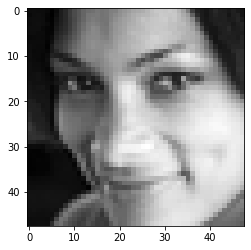

In [14]:
plt.imshow(train_images[6709], cmap='gray')
